## Imports and general Model initiation

In [32]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model_Hardening as model
#import model_ToBeFilled as model
import solvers

In [33]:
# Assemble cantilever Geometry
mesh, BCs = geometry.getCantilever()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

# Model definition
modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

# Define material properties (E, n, yield_stress, Hhardening)
modelA.material.setProperties(210e6, 0.3, 0.24e6, 1e2)
# Define cross-section properties (A)
modelA.section.setProperties(5000)

modelA.setBoundaryConditions(BCs)

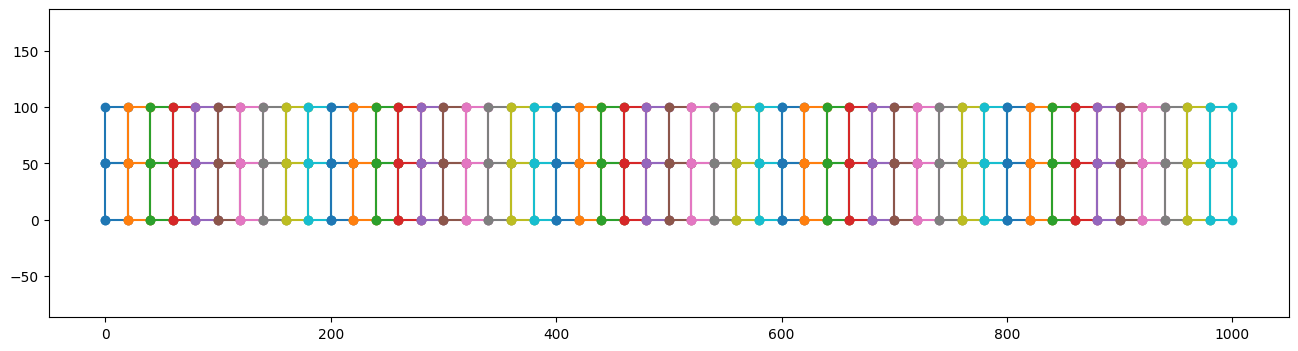

In [34]:
modelA.plotUndeformed(size=(16, 4))

In [35]:
solver = solvers.Static()

solver.setConstraint('Load')
solver.setTolerance(1e-5)
solver.setMaxIterations(50)
solver.setSolutionAttempts(5)

In [36]:
#load_path=np.hstack((0.125*np.ones(170), -0.125*np.ones(75)))
load_path=np.hstack((0.5*np.ones(30), 0.25*np.ones(10), 0.125*np.ones(30), -0.125*np.ones(30)))

## No Isotropic Hardening 

In [37]:
# Load control
model1=modelA
model1.material.setHardeningMode('None')
u1, lambdas1 = solver.solve(model1, load_path)


  0%|          | 0/100 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.122e-07
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.280e-07
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.174e-07
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.656e-07
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.905e-07
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.803e-07
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.028e-07
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.126e-07
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.639e-07
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.426e-07
Step 11
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 3.154e-07
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

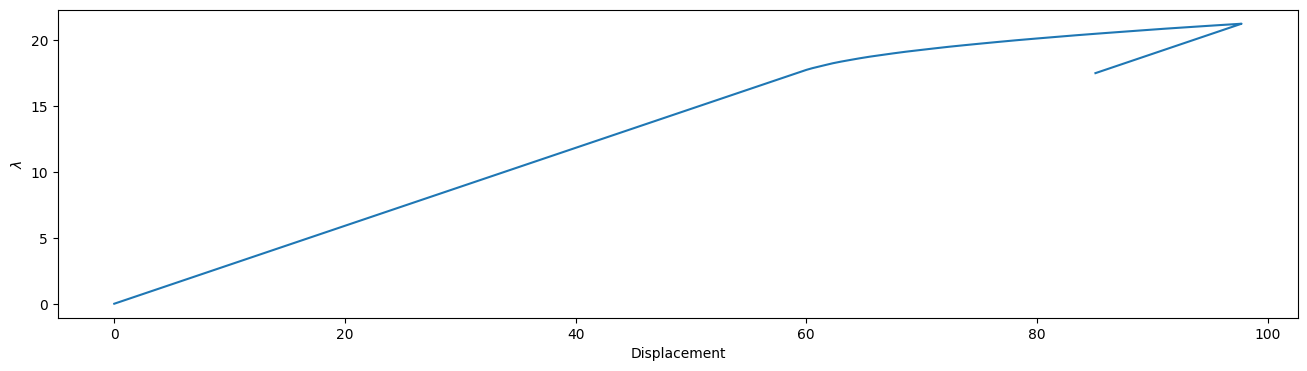

In [38]:
plt.figure(figsize=(16, 4))
plt.plot(u1, lambdas1)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

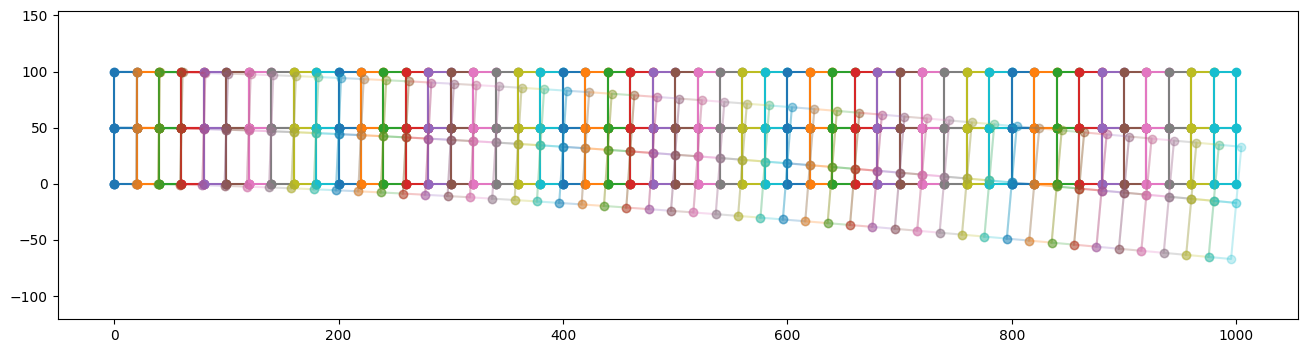

In [39]:
model1.plotUndeformed()
model1.plotDeformed(scale=5, alpha=0.25)

## Strain Hardening

In [40]:
# Load control
model2=modelA
model2.material.setHardeningMode('StrainHardening')
u2, lambdas2 = solver.solve(model2, load_path )

  0%|          | 0/100 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.122e-07
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.280e-07
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.174e-07
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.656e-07
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.905e-07
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.803e-07
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.028e-07
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.126e-07
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.639e-07
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.426e-07
Step 11
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 3.154e-07
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

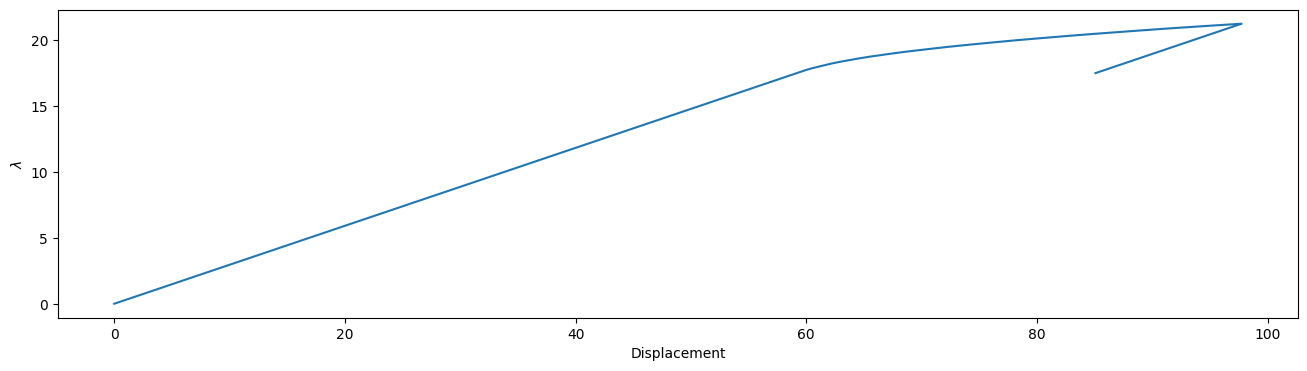

In [41]:
plt.figure(figsize=(16, 4))
plt.plot(u2, lambdas2)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

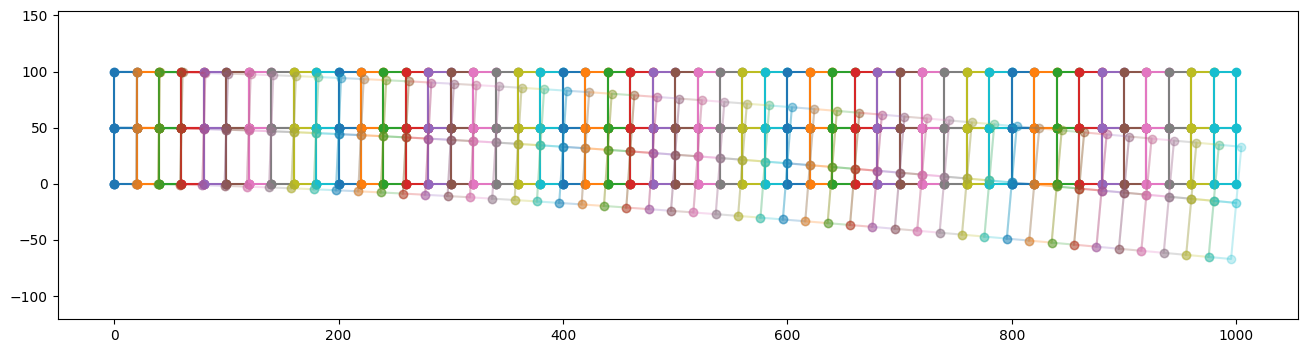

In [42]:
model2.plotUndeformed()
model2.plotDeformed(scale=5, alpha=0.25)

## Work Hardening

In [43]:
# Load control
model3=modelA
model3.material.setHardeningMode('WorkHardening')
u3, lambdas3 = solver.solve(model3, load_path)

  0%|          | 0/100 [00:00<?, ?it/s]

Step 1
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.122e-07
Step 2
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.280e-07
Step 3
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.174e-07
Step 4
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.656e-07
Step 5
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.905e-07
Step 6
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 1.803e-07
Step 7
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.028e-07
Step 8
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.126e-07
Step 9
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.639e-07
Step 10
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 2.426e-07
Step 11
  Attempt 1
    Solution converged after 1 iterations
    Residual norm 3.154e-07
Step 12
  Attempt 1

Text(0, 0.5, '$\\lambda$')

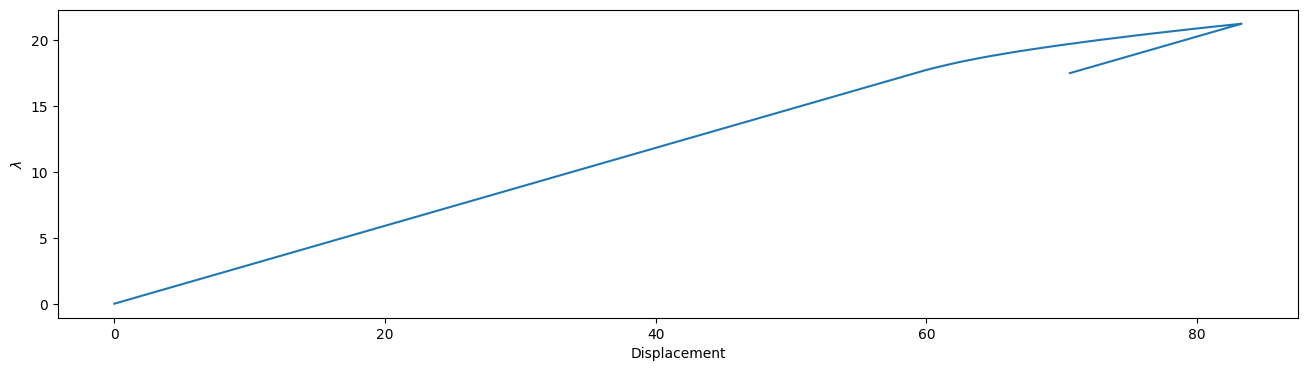

In [44]:
plt.figure(figsize=(16, 4))
plt.plot(u3, lambdas3)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

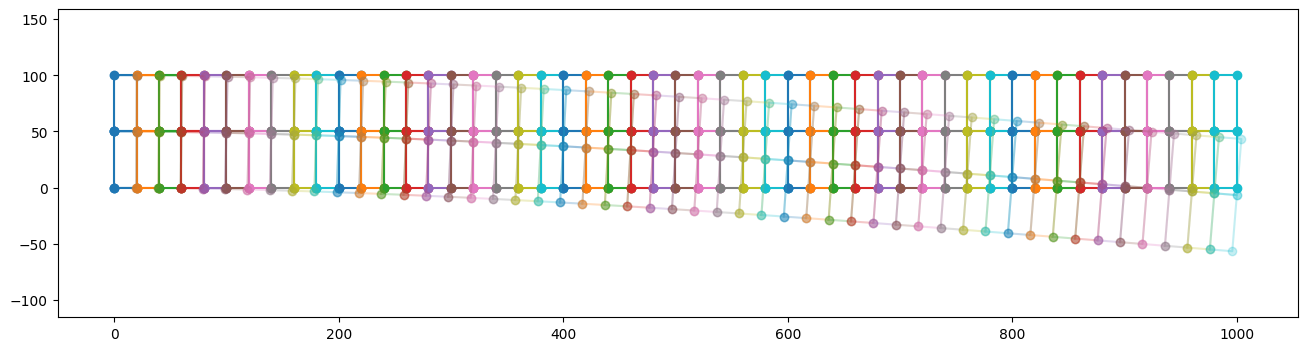

In [45]:
model3.plotUndeformed()
model3.plotDeformed(scale=5, alpha=0.25)

## Comparison

Text(0, 0.5, '$\\lambda$')

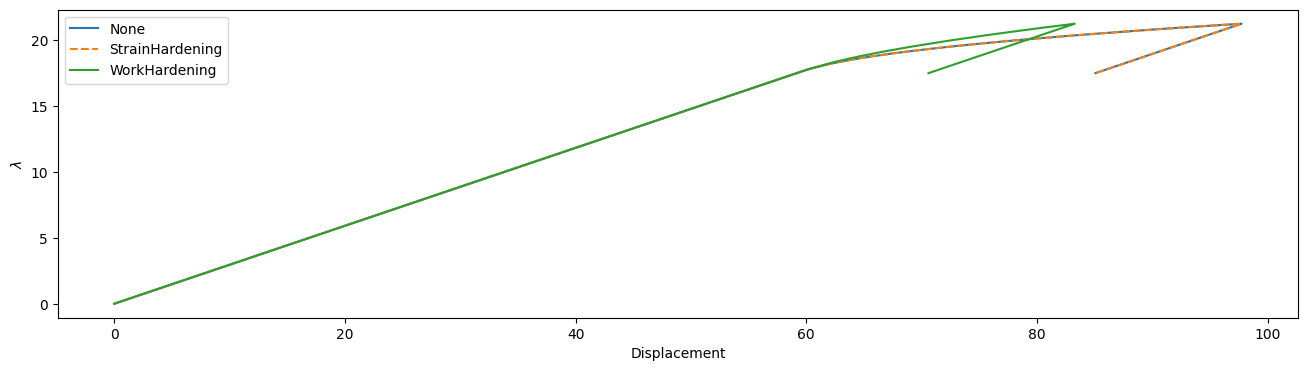

In [46]:
plt.figure(figsize=(16, 4))
plt.plot(u1, lambdas1, label='None')
plt.plot(u2, lambdas2, label='StrainHardening', linestyle ='--')
plt.plot(u3, lambdas3, label='WorkHardening')
plt.legend()

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

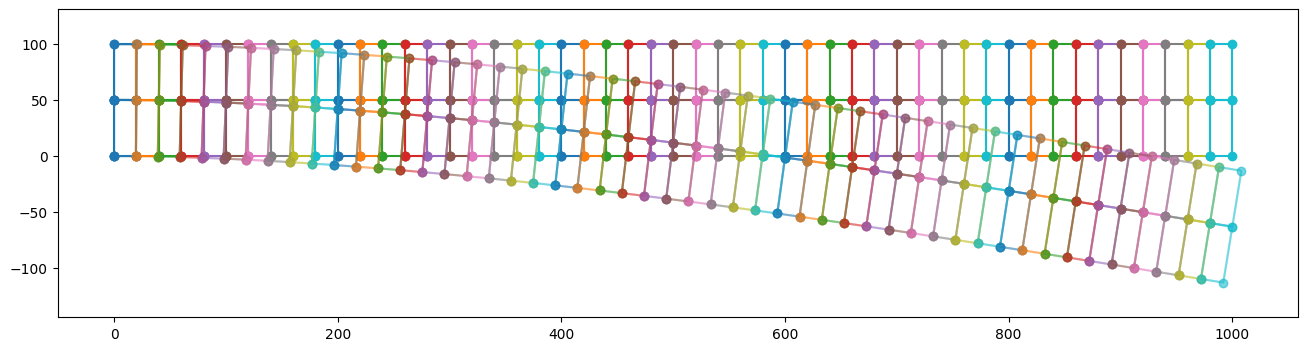

In [50]:
model3.plotUndeformed()
model1.plotDeformed(scale=10, alpha=0.25)
model2.plotDeformed(scale=10, alpha=0.25)
model3.plotDeformed(scale=10, alpha=0.25)